In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Load data

- Dataset Description: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

In [180]:
diabetes_df = pd.read_csv('../../../Datasets/diabetes.txt', delimiter='\t')

In [181]:
diabetes_df.columns

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')

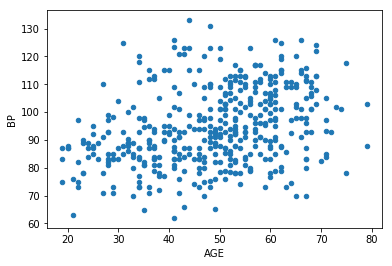

In [182]:
diabetes_df.plot(kind='scatter', x='AGE', y='BP')
plt.show()

In [206]:
diabetes_df.shape

(442, 11)

In [219]:
# let's predict BP from AGE
x_train, x_test, y_train, y_test = train_test_split(diabetes_df[['AGE', 'SEX', 'BMI', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']], diabetes_df[['BP']], test_size=0.1, random_state=2018)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(397, 9) (397, 1) (45, 9) (45, 1)


## Simple Linear Regression

- link: https://en.wikipedia.org/wiki/Simple_linear_regression

In [220]:
# initialize linear regression object
lr = LinearRegression(fit_intercept=True)

# fit data to the model
lr.fit(x_train, y_train)

# make prediction
predicted_train = lr.predict(x_train)
predicted_test  = lr.predict(x_test)

print('Coefficients: \n', lr.coef_)
print('Train stats: ')
print("\tmean squared error: {}".format(mean_squared_error(y_true=y_train, y_pred=predicted_train)))
print('\tvariance score: {}'.format(r2_score(y_true=y_train, y_pred=predicted_train)))

print('Test stats: ')
print("\tmean squared error: {}".format(mean_squared_error(y_true=y_test, y_pred=predicted_test)))
print('\tvariance score: {}'.format(r2_score(y_true=y_test, y_pred=predicted_test)))


# plot outputs
# plt.figure(figsize=(10,5))
# plt.scatter(x_test, y_test,  color='blue')
# plt.plot(x_test, predicted_test, color='red', linewidth=1)
# plt.show()

Coefficients: 
 [[ 0.18244846  4.53119284  0.76888844  0.1229513  -0.08345719 -0.15997197
  -2.15921383  3.02465792  0.19040928]]
Train stats: 
	mean squared error: 127.70330782174558
	variance score: 0.32663361856188255
Test stats: 
	mean squared error: 159.86910708270102
	variance score: 0.20360854516971927


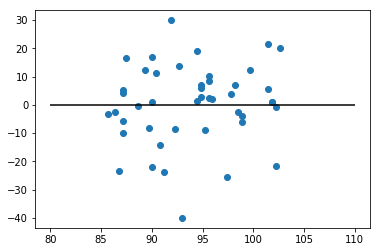

In [213]:
# Plot the residuals after fitting a linear model
plt.scatter(predicted_test, predicted_test-y_test)
plt.hlines(y=0, xmin=80, xmax=110)
plt.show()

## Ridge Regression

In [222]:
# initialize linear regression object
ridge_lr = Ridge(fit_intercept=True, alpha=0.5)

# fit data to the model
ridge_lr.fit(x_train, y_train)

# make prediction
predicted_train = ridge_lr.predict(x_train)
predicted_test  = ridge_lr.predict(x_test)

print('Coefficients: \n', ridge_lr.coef_)
print('Train stats: ')
print("\tmean squared error: {}".format(mean_squared_error(y_true=y_train, y_pred=predicted_train)))
print('\tvariance score: {}'.format(r2_score(y_true=y_train, y_pred=predicted_train)))

print('Test stats: ')
print("\tmean squared error: {}".format(mean_squared_error(y_true=y_test, y_pred=predicted_test)))
print('\tvariance score: {}'.format(r2_score(y_true=y_test, y_pred=predicted_test)))


# plot outputs
# plt.figure(figsize=(10,5))
# plt.scatter(x_test, y_test,  color='blue')
# plt.plot(x_test, predicted_test, color='red', linewidth=1)
# plt.show()

Coefficients: 
 [[ 0.18282166  4.50098872  0.76949952  0.12665478 -0.08716232 -0.16378714
  -2.14914904  2.89456272  0.19076269]]
Train stats: 
	mean squared error: 127.70397800443833
	variance score: 0.3266300847576107
Test stats: 
	mean squared error: 159.9841825265005
	variance score: 0.20303529432860912


## Lasso Regression

Coefficients: 
 [0.36553191]
Train stats: 
	mean squared error: 166.7475510080217
	variance score: 0.12075734801898497
Test stats: 
	mean squared error: 192.9979433371658
	variance score: 0.03857652251709365


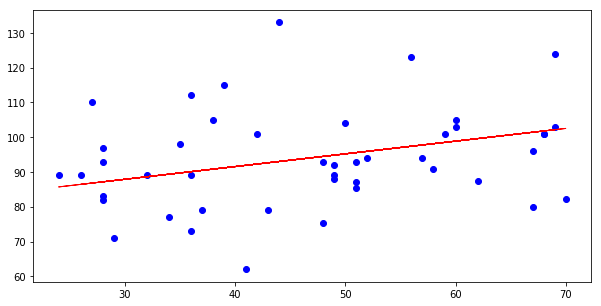

In [188]:
# initialize linear regression object
lasso_lr = Lasso(fit_intercept=True, alpha=0.5)

# fit data to the model
lasso_lr.fit(x_train, y_train)

# make prediction
predicted_train = lasso_lr.predict(x_train)
predicted_test  = lasso_lr.predict(x_test)

print('Coefficients: \n', lasso_lr.coef_)
print('Train stats: ')
print("\tmean squared error: {}".format(mean_squared_error(y_true=y_train, y_pred=predicted_train)))
print('\tvariance score: {}'.format(r2_score(y_true=y_train, y_pred=predicted_train)))

print('Test stats: ')
print("\tmean squared error: {}".format(mean_squared_error(y_true=y_test, y_pred=predicted_test)))
print('\tvariance score: {}'.format(r2_score(y_true=y_test, y_pred=predicted_test)))


# plot outputs
plt.figure(figsize=(10,5))
plt.scatter(x_test, y_test,  color='blue')
plt.plot(x_test, predicted_test, color='red', linewidth=1)
plt.show()

## kNN Regression 

In [226]:
knn_r = KNeighborsRegressor(n_neighbors=40)

# fit data to the model
knn_r.fit(x_train, y_train)

# make prediction
predicted_train = knn_r.predict(x_train)
predicted_test  = knn_r.predict(x_test)

print('Train stats: ')
print("\tmean squared error: {}".format(mean_squared_error(y_true=y_train, y_pred=predicted_train)))
print('\tvariance score: {}'.format(r2_score(y_true=y_train, y_pred=predicted_train)))

print('Test stats: ')
print("\tmean squared error: {}".format(mean_squared_error(y_true=y_test, y_pred=predicted_test)))
print('\tvariance score: {}'.format(r2_score(y_true=y_test, y_pred=predicted_test)))

Train stats: 
	mean squared error: 139.26931471725442
	variance score: 0.265647256158583
Test stats: 
	mean squared error: 182.0038309736111
	variance score: 0.09334393380468897


## Trees

In [227]:
dt_r = DecisionTreeRegressor()

# fit data to the model
dt_r.fit(x_train, y_train)

# make prediction
predicted_train = dt_r.predict(x_train)
predicted_test  = dt_r.predict(x_test)

print('Train stats: ')
print("\tmean squared error: {}".format(mean_squared_error(y_true=y_train, y_pred=predicted_train)))
print('\tvariance score: {}'.format(r2_score(y_true=y_train, y_pred=predicted_train)))

print('Test stats: ')
print("\tmean squared error: {}".format(mean_squared_error(y_true=y_test, y_pred=predicted_test)))
print('\tvariance score: {}'.format(r2_score(y_true=y_test, y_pred=predicted_test)))

Train stats: 
	mean squared error: 0.0
	variance score: 1.0
Test stats: 
	mean squared error: 379.5539288888889
	variance score: -0.8907562013091352


In [204]:
rf_r = RandomForestRegressor(n_estimators=100)

# fit data to the model
rf_r.fit(x_train, y_train.values.reshape(len(y_train),))

# make prediction
predicted_train = rf_r.predict(x_train)
predicted_test  = rf_r.predict(x_test)

print('Train stats: ')
print("\tmean squared error: {}".format(mean_squared_error(y_true=y_train, y_pred=predicted_train)))
print('\tvariance score: {}'.format(r2_score(y_true=y_train, y_pred=predicted_train)))

print('Test stats: ')
print("\tmean squared error: {}".format(mean_squared_error(y_true=y_test, y_pred=predicted_test)))
print('\tvariance score: {}'.format(r2_score(y_true=y_test, y_pred=predicted_test)))

Train stats: 
	mean squared error: 146.40968762486773
	variance score: 0.22799680568137437
Test stats: 
	mean squared error: 240.77323205133393
	variance score: -0.19941712352441932
